# Neural Networks

This is a big step, all we are going to learn from now on depends on the fundamentals found here. A Neural Networks is simple a tone of linear regressors conected all together. A simple neuron, is not more than that.

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
# Fashion Mnist explanation https://github.com/zalandoresearch/fashion-mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape # Explore the data

(60000, 28, 28)

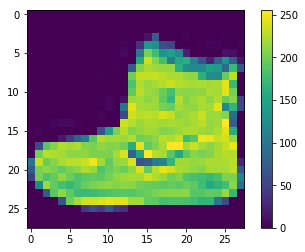

In [3]:
# Just a look on the first element
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

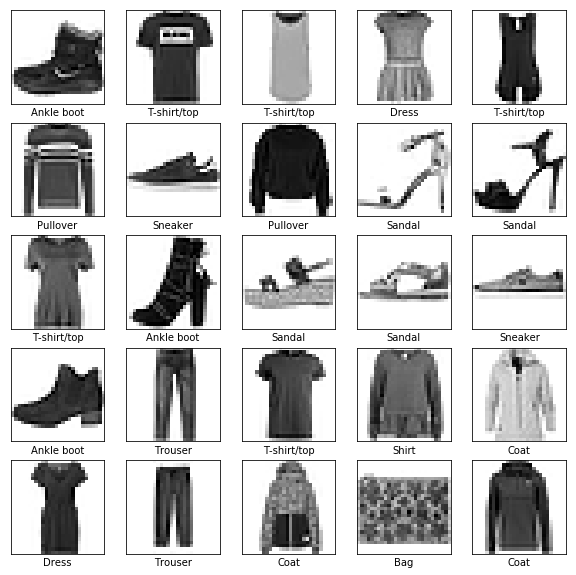

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Shows on the screen some of the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
# Building up the model
# Build - Compile - Fit!
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_images, train_labels, epochs=5)
model.save('../models/fashion_mnist.h5')
print("\nSaved model to disk")

Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5018 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3763 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3354 - acc: 0.8787
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3120 - acc: 0.8864
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2953 - acc: 0.8911
Saved model to disk


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3448 - acc: 0.8767
Test accuracy: 0.8767


In [9]:
# Predicting the model
predictions = model.predict(test_images)
predictions[0] # Probabilities to be each one of the classes
np.argmax(predictions[0]) == test_labels[0]

True

In [10]:
# Tests to run into...

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
 
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color
    )

In [11]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

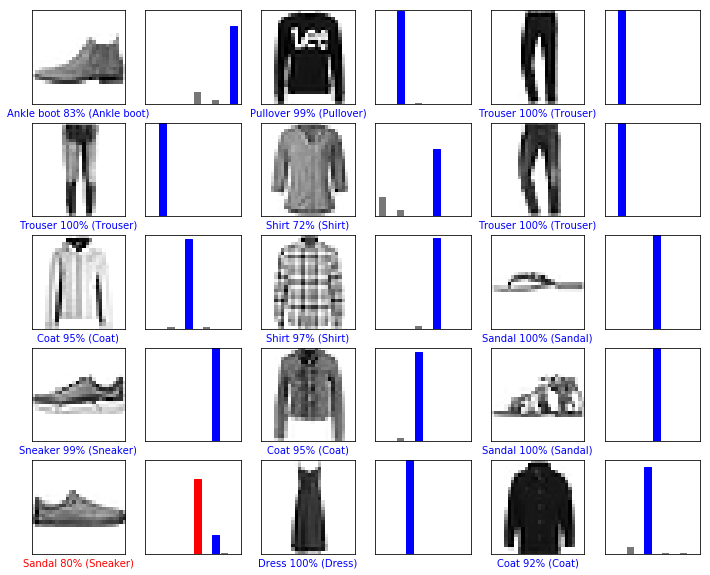

In [12]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()